In [2]:
#데이터 과학을 위한 통계
#EDA(탐색적 데이터 분석)
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles
import statsmodels.robust.scale as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
#pd.set_option("plotting.backend","plotly") #pandas plotly 연결

## 위치추정
평균 가중평균 중간값 백분위수 가중 중간값 절사평균 

예제: 인구에 따른 살인 비율의 추정 위치 추정
===

In [3]:
state = pd.read_csv("/Users/jeonhyeongjin/Downloads/practical-statistics-for-data-scientists-master/data/state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [4]:
state.Population.mean()

6162876.3

In [5]:
#절사 평균 구하기 scipy.stats 패키지
trim_mean(state.Population,0.1)

4783697.125

In [6]:
state.sort_values(by = 'Population',ascending=False)

,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
42,Texas,25145561,4.4,TX
31,New York,19378102,3.1,NY
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL
37,Pennsylvania,12702379,4.8,PA
34,Ohio,11536504,4.0,OH
21,Michigan,9883640,5.4,MI
9,Georgia,9687653,5.7,GA
32,North Carolina,9535483,5.1,NC


In [7]:
state.Population.median()

4436369.5

## 결과 : mean > trim_mean > median
### 평균은 특이값,이상 데이터에 대해 민감할수있음. 따라서 절사평균,중간값에 대한 고려 필요(robust)

In [8]:
#각 주 인구에 따른 가중평균,중간값
np.average(state['Murder.Rate'],weights = state.Population) 

4.445833981123393

In [9]:
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

4.4

## 변이추정(variability)
데이터 값이 얼마나 밀집,퍼져있는지를 나타내는 산포도

- 편차

- 분산 $\frac{편차^2}{n-1}$

- 표준편차 $\sqrt{분산}$   

- 평균절대편차(average absolute deviation : AAD)  편차 절대값의 평균

- 중간값의 중위절대편차(median absolute deviation : MAD) |관측값-중앙값| 의 중앙값  <br>~~제곱편차를 이용하는 분산,표준편차에 비해 로버스트함.(특이값에 둔감)~~

- 범위(range) 데이터 최대값 - 최소값

- 순서통게량(order statistics) 정렬데이터를 나타내는 통계량

- 백분위수(percentile) 

- 사분위범위(iterquartile range) 75백분위수 - 25백분위수


In [10]:
#pd에서 표준편차와 분위수 메서드를 제공
state.Population.std()

6848235.347401142

In [11]:
state.Population.quantile(0.75) - state.Population.quantile(0.25)

4847308.0

In [12]:
#robust 는 statsmodels 패키치의 robust.scale.mad
#표준편차의 거의 절반수준. 특이값에 덜 민감한 모습을 확인할 수 있다.
sm.mad(state.Population)

3849876.1459979336

1.5 데이터 분포 탐색하기
===
- 상자그림(boxplot)
- 도수분포표(frequency table)
- 히스토그램(histogram)
- 밀도 그림(density plot)

In [13]:
state['Murder.Rate'].quantile([.05,.25,.5,.75,.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

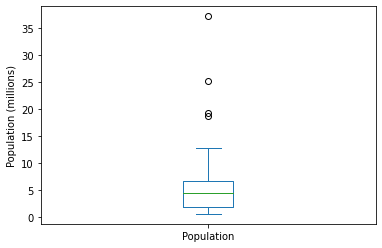

In [14]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

<AxesSubplot:ylabel='Murder.Rate'>

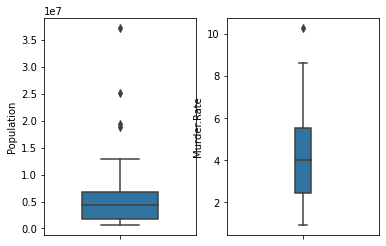

In [15]:
#sns.set_style("whitegrid")
fig,axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (9,6)
sns.boxplot(y="Population",data=state,width=.5,ax = axes[0])
plt.rcParams["figure.figsize"] = (9,6)
sns.boxplot(y="Murder.Rate",data=state,width=.1,ax = axes[1])

In [16]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

<AxesSubplot:ylabel='Population'>

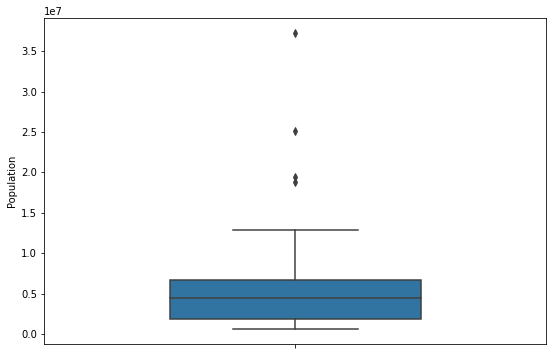

In [17]:
plt.rcParams["figure.figsize"] = (9,6)
sns.boxplot(y="Population",data=state,width=.5)

In [19]:
import plotly.io as pio
pio.renderers.default = "vscode"

In [20]:
px.box(state,y=state.Population)

In [24]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show(renderer='jupyter')

ValueError: 
Invalid named renderer(s) received: ['jupyter']